In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
N = 100
P = 50

ori_img = cv2.imread('./barbara.png', 0)
img = cv2.resize(ori_img, (N,N))
imvec = np.reshape(np.array(img), (N*N,1))

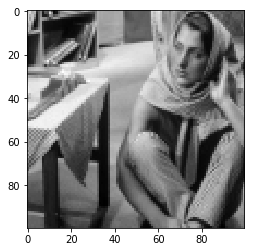

In [3]:
def imshow(imgdata):
    plt.imshow(imgdata, cmap = 'gray')
    plt.show()

imshow(img)

![](assets/formula.jpeg)

In [4]:
# GENERATE MATRIX TRANSFORM

matN = np.ones((2 * P + 1, 2 * P + 1), dtype='float32')
matM = np.ones((2 * P + 1, 2 * P + 1), dtype='float32')
for i in range(-P, P+1):
    matN[i + P,:] = i
    matM[:,i + P] = i
matN = matN.reshape(((2 * P + 1) * (2 * P + 1), 1))
matN = np.repeat(matN, N * N, axis=1)
matM = matM.reshape(((2 * P + 1) * (2 * P + 1), 1))
matM = np.repeat(matM, N * N, axis=1)

matI = np.ones((N,N), dtype='float32')
matK = np.ones((N,N), dtype='float32')
for i in range(N):
    matI[i,:] = i
    matK[:,i] = i
matI = matI.reshape((1, N * N))
matI = np.repeat(matI, (2 * P + 1) * (2 * P + 1), axis=0)
matK = matK.reshape((1, N * N))
matK = np.repeat(matK, (2 * P + 1) * (2 * P + 1), axis=0)

matY = (2 * matI - N + 1) / (N - 1) / np.sqrt(2)
matX = (2 * matK - N + 1) / (N - 1) / np.sqrt(2)
matR = np.sqrt(matX * matX + matY * matY)
matT = np.arctan2(matY, matX)

# FREE UP SOME MEMORY - 1
del matI
del matK
del matY
del matX

matW = 2 / (4.9 * np.pi * N * N) * np.exp(-2 * np.pi * matN * matR * matR * 1j - matM * matT * 1j)

# FREE UP SOME MEMORY - 2
del matN
del matM
del matR
del matT

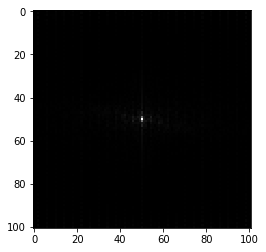

In [5]:
transformed = np.matmul(matW, imvec)
transformed_abs = np.abs(transformed)
transformed_abs_img = np.reshape(transformed_abs, (2 * P + 1, 2 * P + 1))
imshow(transformed_abs_img)

In [6]:
# GENERATE MATRIX INVERS TRANSFORM

matN = np.ones((2 * P + 1, 2 * P + 1), dtype='float32')
matM = np.ones((2 * P + 1, 2 * P + 1), dtype='float32')
for i in range(-P, P+1):
    matN[i + P,:] = i
    matM[:,i + P] = i
matN = matN.reshape((1, (2 * P + 1) * (2 * P + 1)))
matN = np.repeat(matN, N * N, axis=0)
matM = matM.reshape((1, (2 * P + 1) * (2 * P + 1)))
matM = np.repeat(matM, N * N, axis=0)

matI = np.ones((N,N), dtype='float32')
matK = np.ones((N,N), dtype='float32')
for i in range(N):
    matI[i,:] = i
    matK[:,i] = i
matI = matI.reshape((N*N,1))
matI = np.repeat(matI, (2 * P + 1)*(2 * P + 1), axis=1)
matK = matK.reshape((N*N,1))
matK = np.repeat(matK, (2 * P + 1)*(2 * P + 1), axis=1)

matY = (2 * matI - N + 1) / (N - 1) / np.sqrt(2)
matX = (2 * matK - N + 1) / (N - 1) / np.sqrt(2)
matR = np.sqrt(matX * matX + matY * matY)
matT = np.arctan2(matY, matX)

# FREE UP SOME MEMORY - 1
del matI
del matK
del matY
del matX

matV = np.exp(2 * np.pi * matN * matR * matR * 1j + matM * matT * 1j)

# FREE UP SOME MEMORY - 2
del matN
del matM
del matR
del matT

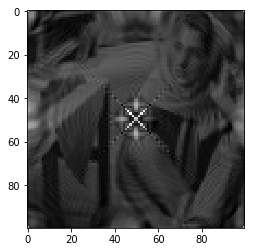

In [7]:
inversed = np.matmul(matV, transformed)
inversed_abs = np.abs(inversed)
inversed_abs_img = np.reshape(inversed_abs, (N,N))
imshow(inversed_abs_img)

In [ ]:
matVW = np.matmul(matV, matW)
matVW = np.abs(matVW)
# matVW = np.floor(matVW)
print(np.sum(matVW))
print(matVW)

In [ ]:
inversed_abs_img